In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined.head()

# Display the data table for preview
combined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice
# Unique mice by Mouse ID 

unique = combined["Mouse ID"].unique()
len(unique)

249

In [3]:
#Total rows, with duplicated Mouse ID's 
count = combined["Sex"].value_counts()
count

Male      958
Female    935
Name: Sex, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#First I tried with this function to see my duplicated rows, but didnt obtain all the rows for the Mouse ID "g989". 
#duplicateRows = combined[combined.duplicated(keep = False)]
#print(duplicateRows)

#So I found subset to consider the Mouse ID and the Timepoint column. 
duplicateID = combined[combined.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicateID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined.loc[combined["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_cleandata = clean_data["Mouse ID"].unique()
len(unique_cleandata)

248

In [7]:
clean_data["Mouse ID"].count()

1880

## Summary Statistics


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_drug = clean_data.groupby(['Drug Regimen'])


#To see my groupby table 
#grouped_drug.first()

mean = grouped_drug['Tumor Volume (mm3)'].mean()
median = grouped_drug['Tumor Volume (mm3)'].median()
var = grouped_drug['Tumor Volume (mm3)'].var()
std = grouped_drug['Tumor Volume (mm3)'].std()
sem = grouped_drug['Tumor Volume (mm3)'].sem()
drug_df = pd.DataFrame({ "mean": mean, 
       "median":median,
       "var": var,
       "std":std,
       "sem":sem
})

drug_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

drug_two = clean_data.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg([np.mean,np.median,np.var,np.std,st.sem])     
drug_two

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
#See my values per Drug Regimen
drug_count = grouped_drug["Drug Regimen"].count()
drug_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

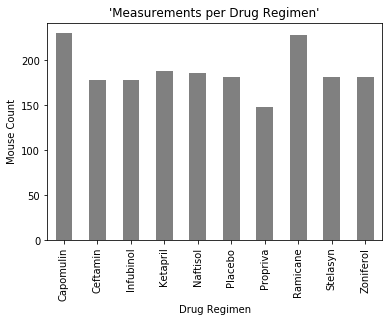

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_pandas = drug_count.plot(kind='bar', color = "gray",title="'Measurements per Drug Regimen'", width= .5)

#Adding format 
drug_pandas.set_xlabel("Drug Regimen")
drug_pandas.set_ylabel("Mouse Count")


#Let's see my chart
plt.show()
plt.tight_layout()


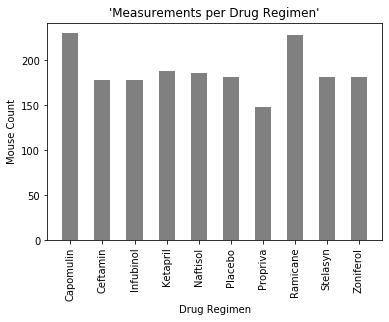

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_count))

# Creating the bar chart 
plt.bar(x_axis, drug_count, color="gray", align="center", width=.5)

#Adding the thicks. Found the list(df.index.values) recommendation on https://www.geeksforgeeks.org/how-to-get-rows-index-names-in-pandas-dataframe/ 
drugs_names = list(drug_count.index.values)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drugs_names,rotation=90)

#Adding details to the chart 
plt.title("'Measurements per Drug Regimen'")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")

#Let's see the chart
plt.show()
plt.tight_layout()

In [13]:
list(drug_count.index.values)

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

(-1.1091177556002698,
 1.2128639238082213,
 -1.106700641755685,
 1.1034697461867102)

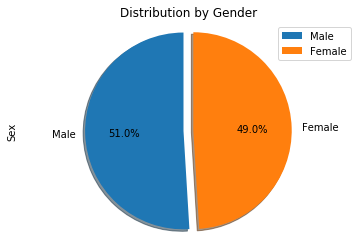

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_values = clean_data["Sex"].value_counts()
gender_pie = gender_values.plot.pie(title="Distribution by Gender",startangle=90, explode=(0,0.1),autopct="%1.1f%%",shadow=True)
gender_pie.legend(loc="upper right", labels=gender_values.index.values)
plt.axis("equal")

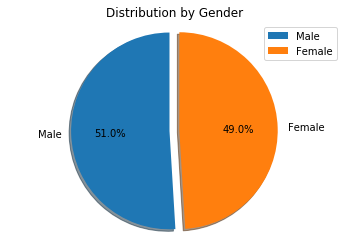

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values_gender = clean_data["Sex"].value_counts()
explode = (0,0.1)
plt.pie(values_gender, explode=explode, autopct="%1.1f%%", shadow=True, startangle=90, labels=values_gender.index.values)
plt.legend(values_gender.index.values)
plt.title("Distribution by Gender")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Actually found a tweet with filter recommendations and found .isin :) 
selected_regimens = clean_data.loc[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane","Infubinol","Ceftamin"])]
selected_regimens

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [17]:
# Start by getting the last (greatest) timepoint for each mouse

#I tried the following line: selected_regimens.groupby(["Mouse ID"]).max(["Timepoint"])
#but kept having an error: f() takes 1 positional argument but 2 were given
#Will definitely keep looking on that one to keep my code more simple 

mouse_group = selected_regimens.groupby(["Mouse ID"])
timepoint = mouse_group["Timepoint"].max()

In [18]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(timepoint, clean_data, on=["Mouse ID", "Timepoint"], how="left")
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#going over tumor volumen on my merge_df data frame 
#to append in tumor_vol for each treatment 

for treatment in treatments:
    tumor = merge_df.loc[merge_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol.append(tumor)
    
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The median of {treatment} is: {quartiles[0.5]} ")


        # Locate the rows which contain mice on each drug and get the tumor volumes
        # add subset 
        # Determine outliers using upper and lower bounds

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {treatment} {lower_bound} could be outliers.")
    print(f"Values above {treatment} {upper_bound} could be outliers.")

    
    outlier_tumor = tumor.loc[(tumor < lower_bound) 
                              | (tumor> upper_bound)].count()
    
    print(f"Outliers for {treatment} are  {outlier_tumor}.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.125164399999996 
Values below Capomulin 20.70456164999999 could be outliers.
Values above Capomulin 51.83201549 could be outliers.
Outliers for Capomulin are  0.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229 
Values below Ramicane 17.912664470000003 could be outliers.
Values above Ramicane 54.30681135 could be outliers.
Outliers for Ramicane are  0.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046 
Values below Infubinol 36.83290494999999 could be outliers.
Values above Infubinol 82.74144559000001 could be outliers.
O

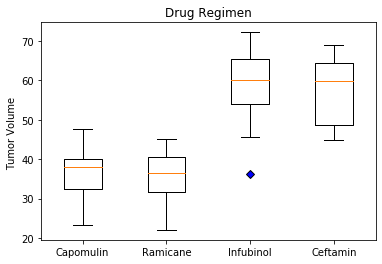

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Found the outlier formatting on https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html 

outlier_change = dict(markerfacecolor='b', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Tumor Volume ')
ax1.boxplot(tumor_vol,  labels = treatments, flierprops=outlier_change)
plt.show()


## Line and Scatter Plots


In [21]:

#Exploring the Capomulin mouses to select one. 
capomulin_mouses = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"] 
capomulin_mouses

#Picked the first in the list
mouse_id = clean_data.loc[clean_data["Mouse ID"] == "s185"] 
mouse_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


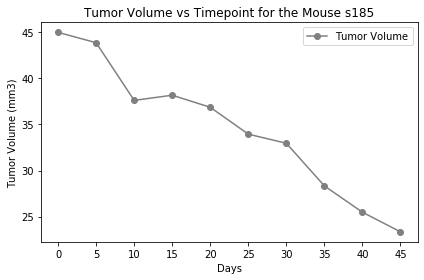

In [29]:
#set x and y values 
x_axis = mouse_id["Timepoint"]
y_axis = mouse_id["Tumor Volume (mm3)"]

# Place a legend on the chart in what matplotlib believes to be the "best" location

plt.title("Tumor Volume vs Timepoint for the Mouse s185")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")

# Print our chart to the screen
plt.xticks(x_axis)
plt.plot(x_axis, y_axis, color="gray", label= "Tumor Volume", marker = 'o')
plt.legend(loc="best")
plt.tight_layout()
plt.show()



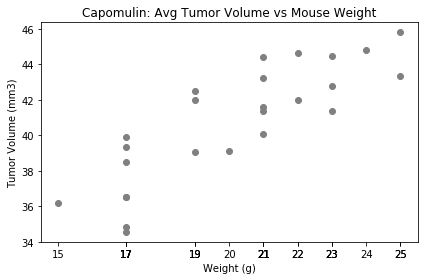

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#This part was extremely hard so I reached out ASKBCS. They explained to me that groupby 
# and the .mean() would return the mean of the remaining columns. 

capomulin_mouses = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"] 
capomulin_average = capomulin_mouses.groupby(['Mouse ID']).mean()


plt.title("Capomulin: Avg Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Print our chart to the screen
plt.xticks(capomulin_average["Weight (g)"])

#Had to add linestyle='None' because I had lines connecting all my dots. Crazy. 
plt.plot(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"],
         marker = "o", color = "gray",linestyle='None')
plt.tight_layout()
plt.show()



## Correlation and Regression


In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

